In [1]:
# magic function that renders the figure in a notebook instead of
# displaying a dump of the figure object
# sets the backend of matplotlib to the 'inline' backend
# with this backend, the output of plotting commands is displayed inline
# within frontends like the Jupyter notebook, directly below the code cell
# that produced it
# the resulting plots will then also be stored in the notebook document
%matplotlib inline

In [2]:
# creating a new directory named plots
!mkdir plots

# creating a new directory named models
!mkdir models

# creating a new directory named processed_datasets
!mkdir processed_datasets

In [3]:
# importing warnings library to handle exceptions, errors, and warning of
# the program
import warnings

# ignoring potential warnings of the program
warnings.filterwarnings('ignore')

In [4]:
# mounting google drive to read files stores in it
# from google.colab import drive

# drive.mount('/content/drive')

In [5]:
# creating a new directory named .kaggle
!mkdir ~/.kaggle

In [6]:
# creating a file named kaggle.json inside .kaggle directory without any
# content
!touch ~/.kaggle/kaggle.json

In [7]:
# kaggle api token json object
api_token = {
    'username': 'tharindarajapaksha',
    'key': '1a0f7b265e98ba4a1fef6af7d878d22e'
}

In [8]:
# importing json which is a python built-in package
# used to work with json data
import json

# opening the created empty kaggle.json file in write mode
# writing api token json object in the file
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

In [9]:
# chmod is the command and system call used to change the access
# permissions of file system objects sometimes known as modes
# chmod 600 sets permissions so that,
# user or owner can read and write but cannot execute
# group cannot read, cannot write and cannot execute
# others cannot read, cannot write and cannot execute
!chmod 600 ~/.kaggle/kaggle.json

In [10]:
# downloading qqp dataset files from kaggle
!kaggle competitions download -c quora-question-pairs --force

 43% 9.00M/21.2M [00:01<00:01, 7.49MB/s]
100% 21.2M/21.2M [00:01<00:00, 14.6MB/s]
100% 4.95M/4.95M [00:00<00:00, 27.6MB/s]

 92% 105M/114M [00:04<00:00, 22.9MB/s] 
100% 114M/114M [00:04<00:00, 26.7MB/s]
 93% 161M/173M [00:03<00:00, 66.3MB/s]
100% 173M/173M [00:03<00:00, 53.1MB/s]


In [11]:
# extracting the downloaded qqp test dataset files from kaggle
!unzip test.csv.zip

Archive:  test.csv.zip
  inflating: test.csv                


In [12]:
# extracting the downloaded qqp train dataset files from kaggle
!unzip train.csv.zip

Archive:  train.csv.zip
  inflating: train.csv               


In [13]:
# downloading glove dataset files from the internet
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2021-07-02 08:49:29--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-07-02 08:49:30--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-07-02 08:49:30--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [14]:
# extracting the downloaded zip file
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [15]:
# listing files and directories
!ls

glove.6B.100d.txt  glove.6B.zip        sample_data		  train.csv
glove.6B.200d.txt  models	       sample_submission.csv.zip  train.csv.zip
glove.6B.300d.txt  plots	       test.csv
glove.6B.50d.txt   processed_datasets  test.csv.zip


In [16]:
# importing pandas library to perform data manipulation and analysis
import pandas as pd

# configuring the pandas dataframes to show all columns
pd.options.display.max_columns = None

In [17]:
# importing train.csv dataset to a pandas dataframe
# quora question pairs (qqp) dataset includes over 400000 potential
# question duplicate pairs each line contains ids for each question in
# the pair, the full text for each question, and a binary value that
# indicates whether the line truly contains a duplicate pair
train_data = pd.read_csv('train.csv')
train_data

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [18]:
# displaying the first 5 rows of the dataframe
train_data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [19]:
# displaying the last 5 rows of the dataframe
train_data.tail()

,id,qid1,qid2,question1,question2,is_duplicate
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0
404289,404289,537932,537933,What is like to have sex with cousin?,What is it like to have sex with your cousin?,0


In [20]:
# displaying the dimensionality of the dataframe
train_data.shape

(404290, 6)

In [21]:
# printing a concise summary of the dataframe
# information such as index, data type, columns, non-null values,
# and memory usage
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [22]:
# dropping id column
train_data.drop('id',
                axis=1,
                inplace=True)
train_data

,qid1,qid2,question1,question2,is_duplicate
0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...
404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,537928,537929,What is one coin?,What's this coin?,0
404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [23]:
# checking for missing or null values in the dataframe
df_null = train_data[train_data.isnull().any(axis=1)]
df_null

,qid1,qid2,question1,question2,is_duplicate
105780,174363,174364,How can I develop android app?,NaN,0
201841,303951,174364,How can I create an Android app?,NaN,0
363362,493340,493341,NaN,My Chinese name is Haichao Yu. What English na...,0


In [24]:
# number of rows with any missing or null values in the dataframe
df_null.shape[0]

3

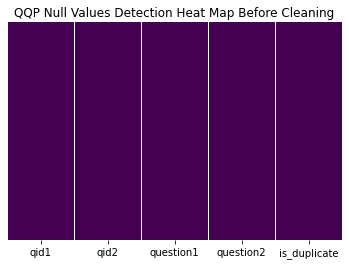

In [25]:
# importing pyplot from matplotlib library to create interactive
# visualizations
import matplotlib.pyplot as plt

# importing seaborn library which is built on top of matplotlib to create
# statistical graphics
import seaborn as sns

# plotting the heatmap for missing or null values in the dataframe before
# cleaning
sns.heatmap(train_data.isnull(),
            yticklabels=False,
            cbar=False,
            cmap='viridis')
plt.title('QQP Null Values Detection Heat Map Before Cleaning')
plt.savefig('plots/quora_null_detection_heat_map_before.png',
            facecolor='white')
plt.show()

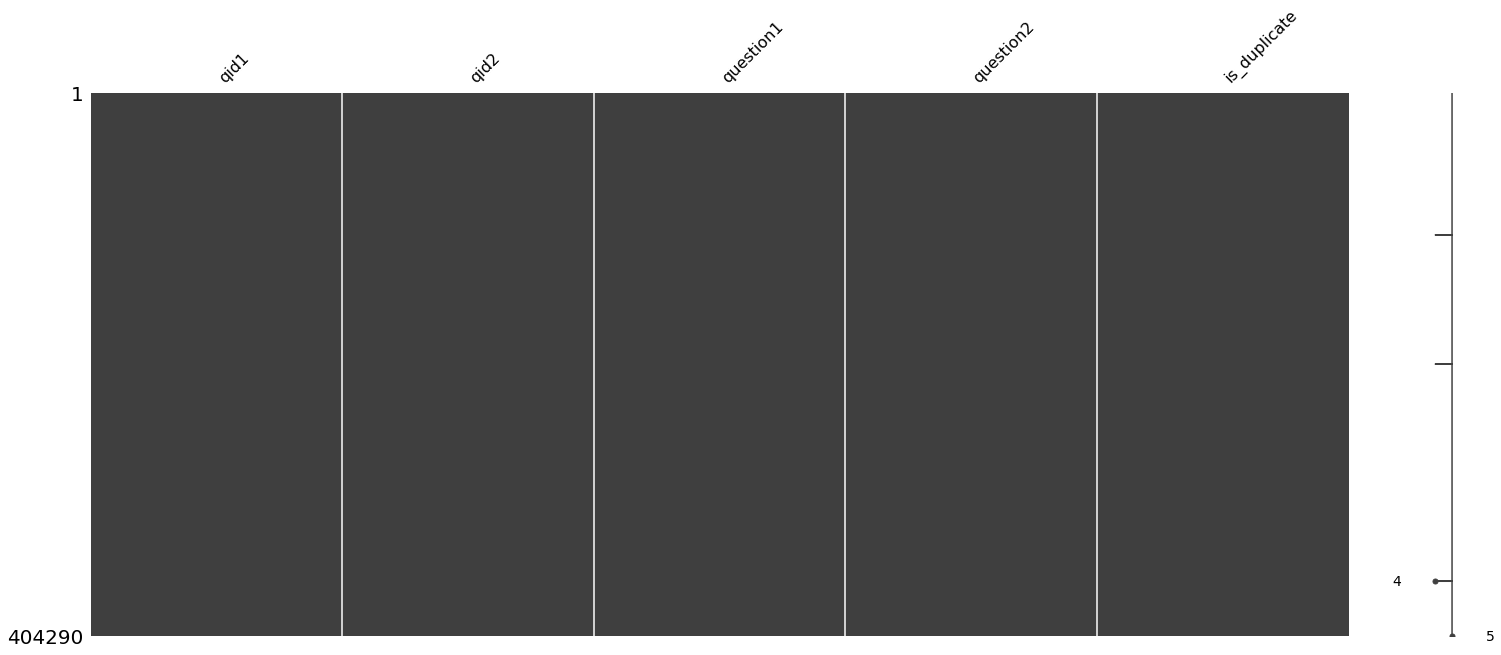

In [26]:
# importing missingno library
# used to understand the distribution of missing values through
# informative visualizations
# visualizations can be in the form of heat maps or bar charts
# used to observe where the missing values have occurred
# used to check the correlation of the columns containing the missing
# with the target column
import missingno as msno

# plotting a matrix visualization of the nullity of the dataframe
# before cleaning
fig = msno.matrix(train_data)
fig_copy = fig.get_figure()
fig_copy.savefig('plots/quora_msno_matrix_before.png',
                 bbox_inches='tight')
fig

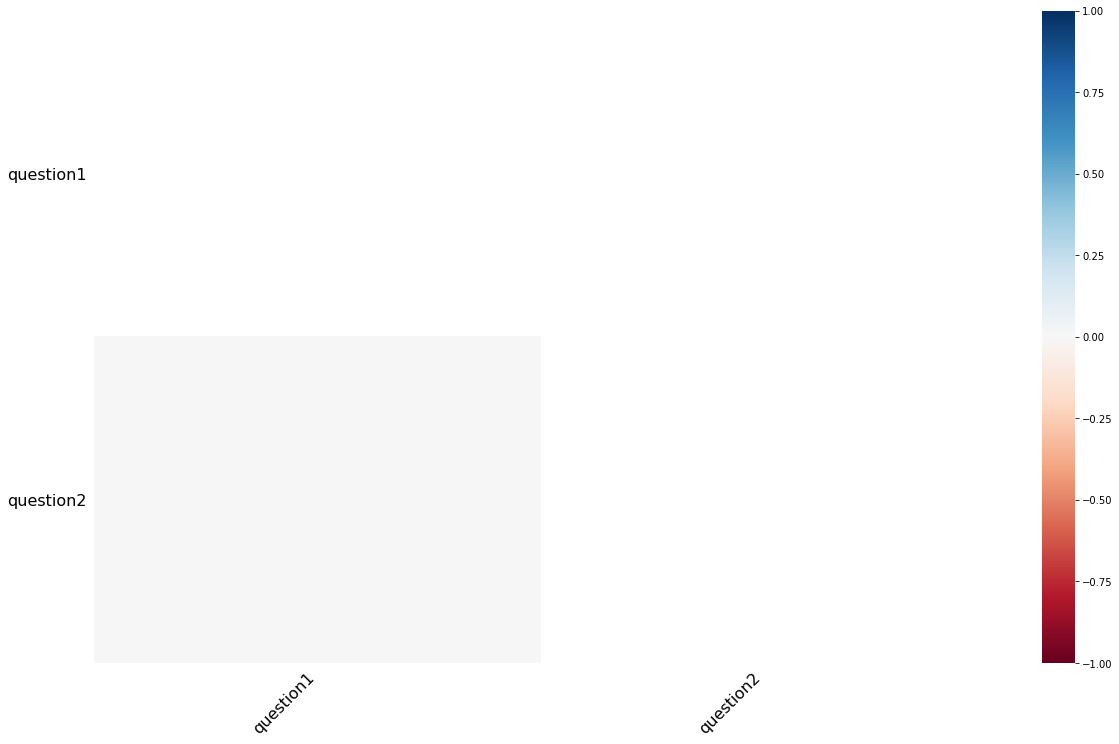

In [27]:
# plotting a seaborn heatmap visualization of nullity correlation
# in the dataframe before cleaning
fig = msno.heatmap(train_data)
fig_copy = fig.get_figure()
fig_copy.savefig('plots/quora_msno_heatmap_before.png',
                 bbox_inches='tight')
fig

In [28]:
# removing the missing or null values from the dataframe if exist
train_data = train_data[train_data.notna().all(axis=1)]
train_data

,qid1,qid2,question1,question2,is_duplicate
0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...
404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,537928,537929,What is one coin?,What's this coin?,0
404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [29]:
# number of rows after removing rows with any missing or null values
# in the dataframe
train_data.shape[0]

404287

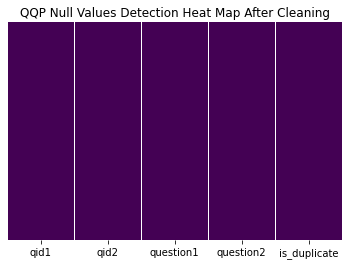

In [30]:
# plotting the heatmap for missing or null values in the dataframe
# after cleaning
sns.heatmap(train_data.isnull(),
            yticklabels=False,
            cbar=False,
            cmap='viridis')
plt.title('QQP Null Values Detection Heat Map After Cleaning')
plt.savefig('plots/quora_null_detection_heat_map_after.png',
            facecolor='white')
plt.show()

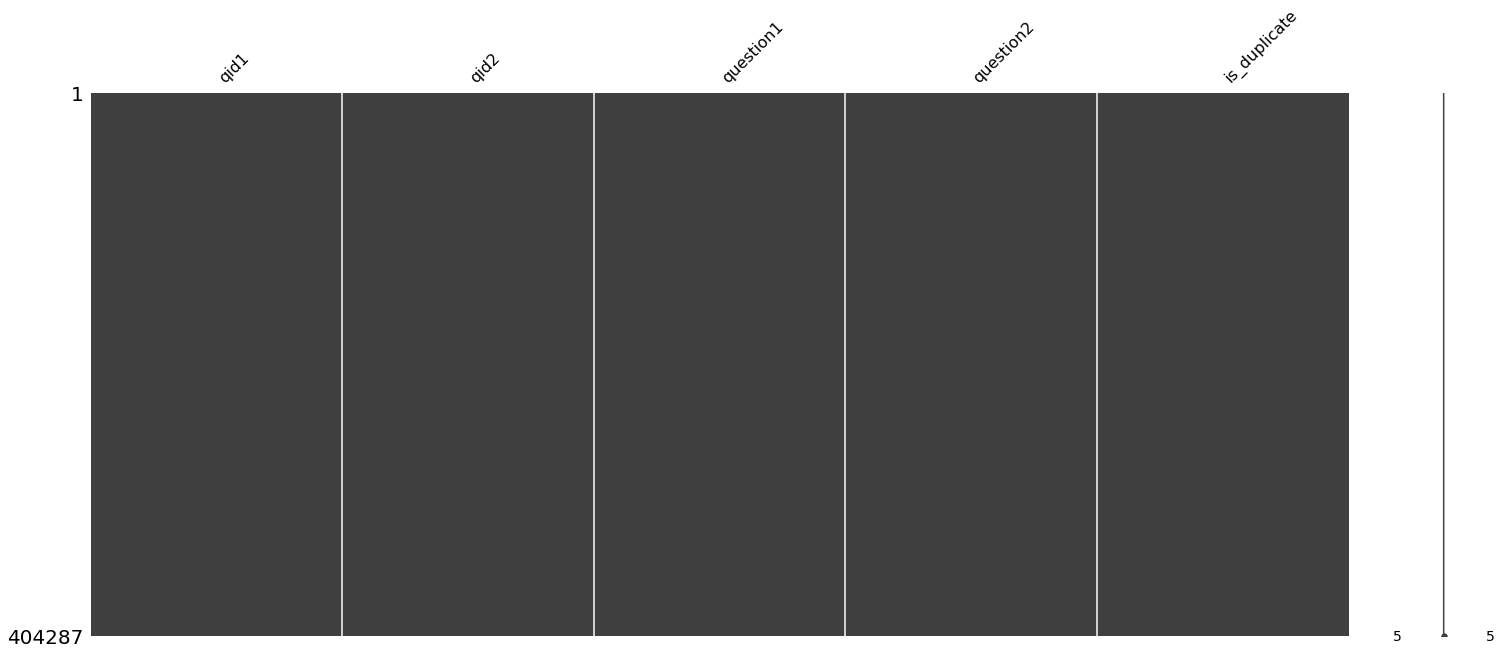

In [31]:
# plotting a matrix visualization of the nullity of the dataframe
# after cleaning
fig = msno.matrix(train_data)
fig_copy = fig.get_figure()
fig_copy.savefig('plots/quora_msno_matrix_after.png',
                 bbox_inches='tight')
fig

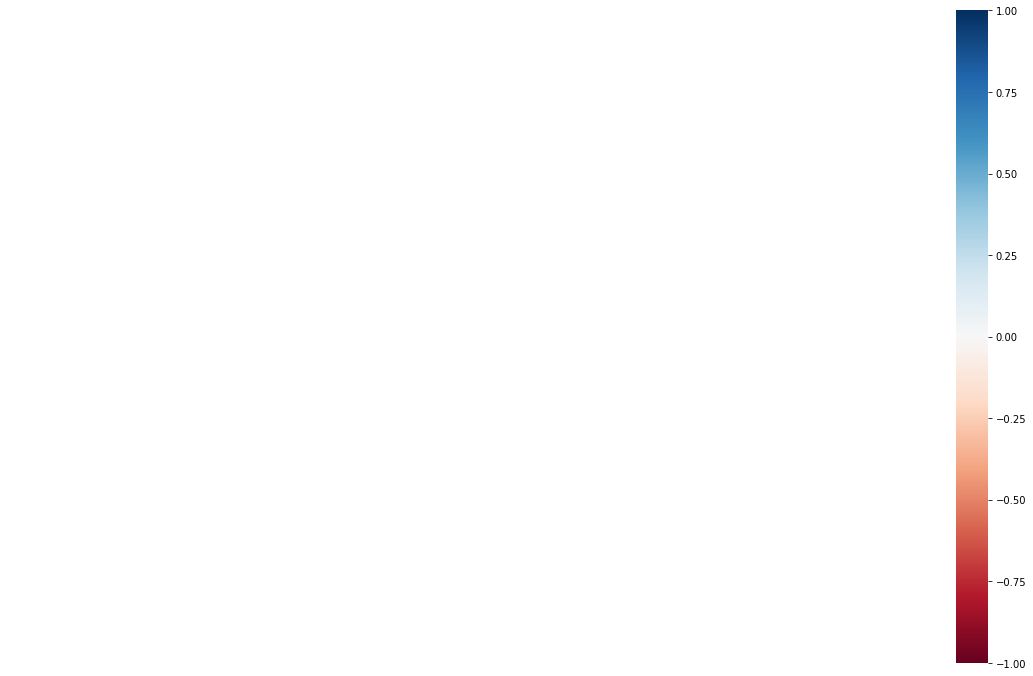

In [32]:
# plotting a seaborn heatmap visualization of nullity correlation
# in the dataframe after cleaning
fig = msno.heatmap(train_data)
fig_copy = fig.get_figure()
fig_copy.savefig('plots/quora_msno_heatmap_after.png',
                 bbox_inches='tight')
fig

In [33]:
# count of null values in question1 and question2 columns of the dataframe
train_data[['question1', 'question2']].isnull().sum()

question1    0
question2    0
dtype: int64

In [34]:
# checking the number of duplicate rows exist in the dataframe
# before cleaning
train_data.duplicated().sum()

0

In [35]:
# removing the duplicate rows from the dataframe if exist
train_data = train_data.drop_duplicates()

In [36]:
# checking the number of duplicate rows exist in the dataframe
# after cleaning
train_data.duplicated().sum()

0

In [37]:
# printing the dataframe
train_data

,qid1,qid2,question1,question2,is_duplicate
0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...
404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,537928,537929,What is one coin?,What's this coin?,0
404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [38]:
# printing a concise summary of the dataframe
# information such as index, data type, columns, non-null values,
# and memory usage
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404287 entries, 0 to 404289
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   qid1          404287 non-null  int64 
 1   qid2          404287 non-null  int64 
 2   question1     404287 non-null  object
 3   question2     404287 non-null  object
 4   is_duplicate  404287 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 18.5+ MB


In [39]:
# printing the columns of the dataframe
train_data.columns

Index(['qid1', 'qid2', 'question1', 'question2', 'is_duplicate'], dtype='object')

In [40]:
# printing count of unique values
train_data['is_duplicate'].value_counts()

0    255024
1    149263
Name: is_duplicate, dtype: int64

In [41]:
# printing count of unique values
train_data.groupby('is_duplicate')['qid1'].count()

is_duplicate
0    255024
1    149263
Name: qid1, dtype: int64

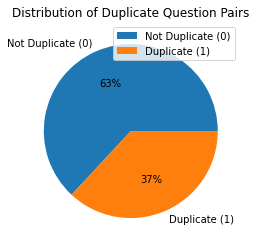

In [42]:
# plotting the distribution of target values
fig = plt.figure()
lbl = ['Not Duplicate (0)', 'Duplicate (1)']
pct = '%1.0f%%'
ax = train_data.groupby('is_duplicate')['qid1'].count().plot(kind='pie',
                                                             labels=lbl,
                                                             autopct=pct)
ax.yaxis.set_visible(False)
plt.title('Distribution of Duplicate Question Pairs')
plt.legend()
fig.savefig('plots/quora_question_pairs_pie_chart.png',
            facecolor='white')
plt.show()

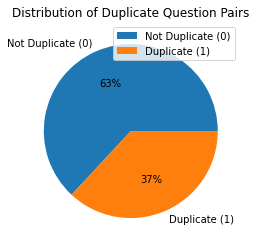

In [43]:
# plotting the distribution of target values
fig = plt.figure()
lbl = ['Not Duplicate (0)', 'Duplicate (1)']
pct = '%1.0f%%'
ax = train_data['is_duplicate'].value_counts().plot(kind='pie',
                                                    labels=lbl,
                                                    autopct=pct)
ax.yaxis.set_visible(False)
plt.title('Distribution of Duplicate Question Pairs')
plt.legend()
fig.savefig('plots/quora_question_pairs_pie_chart.png',
            facecolor='white')
plt.show()

In [44]:
# printing duplicate rows
df_is_duplicate_1 = train_data[train_data['is_duplicate'] == 1]
df_is_duplicate_1

,qid1,qid2,question1,question2,is_duplicate
5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1
11,23,24,How do I read and find my YouTube comments?,How can I see all my Youtube comments?,1
12,25,26,What can make Physics easy to learn?,How can you make physics easy to learn?,1
13,27,28,What was your first sexual experience like?,What was your first sexual experience?,1
...,...,...,...,...,...
404280,537922,537923,What are some outfit ideas to wear to a frat p...,What are some outfit ideas wear to a frat them...,1
404281,99131,81495,Why is Manaphy childish in Pokémon Ranger and ...,Why is Manaphy annoying in Pokemon ranger and ...,1
404282,1931,16773,How does a long distance relationship work?,How are long distance relationships maintained?,1
404284,537926,537927,What does Jainism say about homosexuality?,What does Jainism say about Gays and Homosexua...,1


In [45]:
# printing non duplicate rows
df_is_duplicate_0 = train_data[train_data['is_duplicate'] == 0]
df_is_duplicate_0

,qid1,qid2,question1,question2,is_duplicate
0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...
404283,537924,537925,What do you think of the removal of the MagSaf...,What will the CPU upgrade to the 2016 Apple Ma...,0
404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404287,537928,537929,What is one coin?,What's this coin?,0
404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [46]:
# dropping unnecessary columns from the dataframe
train_data.drop('qid1',
                axis=1,
                inplace=True)
train_data.drop('qid2',
                axis=1,
                inplace=True)
train_data

,question1,question2,is_duplicate
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...
404285,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,What is one coin?,What's this coin?,0
404288,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [47]:
# saving cleaned dataset to a csv file
file_name = 'processed_datasets/qqp_train_data_cleaned.csv'
train_data.to_csv(file_name,
                  encoding='utf-8',
                  index=False)

# loading dataset from the saved csv file to a pandas dataframe
train_data = pd.read_csv(file_name)

# printing the cleaned loaded dataframe
train_data

,question1,question2,is_duplicate
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...
404282,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404283,Do you believe there is life after death?,Is it true that there is life after death?,1
404284,What is one coin?,What's this coin?,0
404285,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [48]:
# importing test.csv dataset to a pandas dataframe
# quora question pairs (qqp) dataset includes over 400000 potential
# question duplicate pairs each line contains ids for each question in
# the pair, the full text for each question, and a binary value that
# indicates whether the line truly contains a duplicate pair
test_data = pd.read_csv('test.csv')
test_data

,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,2,What but is the best way to send money from Ch...,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?
...,...,...,...
3563470,2345791,How do Peaks (TV series): Why did Leland kill ...,What is the most study scene in twin peaks?
3563471,2345792,"What does be ""in transit"" mean on FedEx tracking?",How question FedEx packages delivered?
3563472,2345793,What are some famous Romanian drinks (alcoholi...,Can a non-alcoholic restaurant be a huge success?
3563473,2345794,What were the best and worst things about publ...,What are the best and worst things examination...


In [49]:
# displaying the first 5 rows of the dataframe
test_data.head()

,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,2,What but is the best way to send money from Ch...,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?


In [50]:
# displaying the last 5 rows of the dataframe
test_data.tail()

,test_id,question1,question2
3563470,2345791,How do Peaks (TV series): Why did Leland kill ...,What is the most study scene in twin peaks?
3563471,2345792,"What does be ""in transit"" mean on FedEx tracking?",How question FedEx packages delivered?
3563472,2345793,What are some famous Romanian drinks (alcoholi...,Can a non-alcoholic restaurant be a huge success?
3563473,2345794,What were the best and worst things about publ...,What are the best and worst things examination...
3563474,2345795,What is the best medication equation erectile ...,How do I out get rid of Erectile Dysfunction?


In [51]:
# displaying the dimensionality of the dataframe
test_data.shape

(3563475, 3)

In [52]:
# printing a concise summary of the dataframe
# information such as index, data type, columns, non-null values,
# and memory usage
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3563475 entries, 0 to 3563474
Data columns (total 3 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   test_id    object
 1   question1  object
 2   question2  object
dtypes: object(3)
memory usage: 81.6+ MB


In [53]:
# dropping id column
test_data.drop('test_id',
               axis=1,
               inplace=True)
test_data

,question1,question2
0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,What but is the best way to send money from Ch...,What you send money to China?
3,Which food not emulsifiers?,What foods fibre?
4,"How ""aberystwyth"" start reading?",How their can I start reading?
...,...,...
3563470,How do Peaks (TV series): Why did Leland kill ...,What is the most study scene in twin peaks?
3563471,"What does be ""in transit"" mean on FedEx tracking?",How question FedEx packages delivered?
3563472,What are some famous Romanian drinks (alcoholi...,Can a non-alcoholic restaurant be a huge success?
3563473,What were the best and worst things about publ...,What are the best and worst things examination...


In [54]:
# checking for missing or null values in the dataframe
df_null = test_data[test_data.isnull().any(axis=1)]
df_null

,question1,question2
379205,How I can learn android app development?,NaN
817520,How real can learn android app development?,NaN
943911,How app development?,NaN
1046690,NaN,How I what can learn android app development?
1270024,How I can learn app development?,NaN
1461432,NaN,How distinct can learn android app development?
2345796,NaN,NaN
2487703,How I can learn app development?,NaN
2679111,NaN,How distinct can learn android app development?


In [55]:
# number of rows with any missing or null values in the dataframe
df_null.shape[0]

9

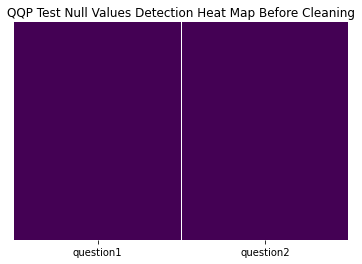

In [56]:
# plotting the heatmap for missing or null values in the dataframe before
# cleaning
sns.heatmap(test_data.isnull(),
            yticklabels=False,
            cbar=False,
            cmap='viridis')
plt.title('QQP Test Null Values Detection Heat Map Before Cleaning')
plt.savefig('plots/quora_test_null_detection_heat_map_before.png',
            facecolor='white')
plt.show()

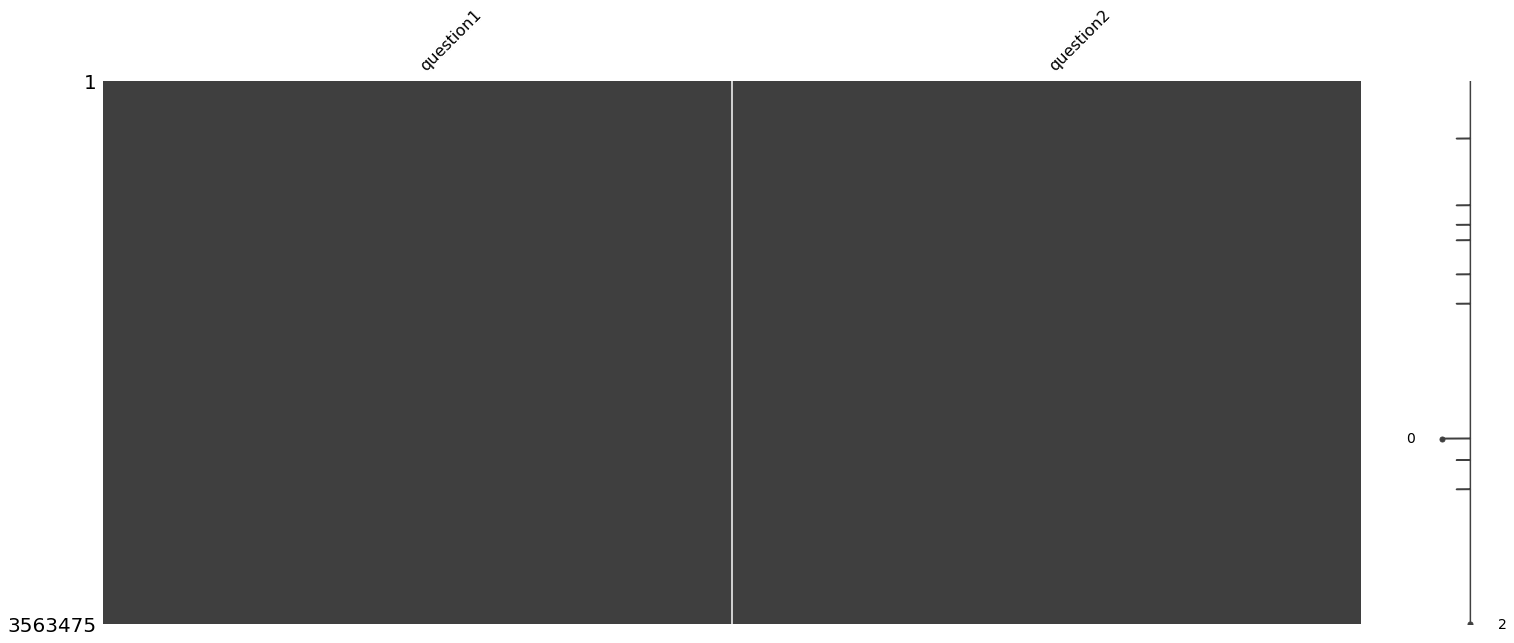

In [57]:
# plotting a matrix visualization of the nullity of the dataframe
# before cleaning
fig = msno.matrix(test_data)
fig_copy = fig.get_figure()
fig_copy.savefig('plots/quora_test_msno_matrix_before.png',
                 bbox_inches='tight')
fig

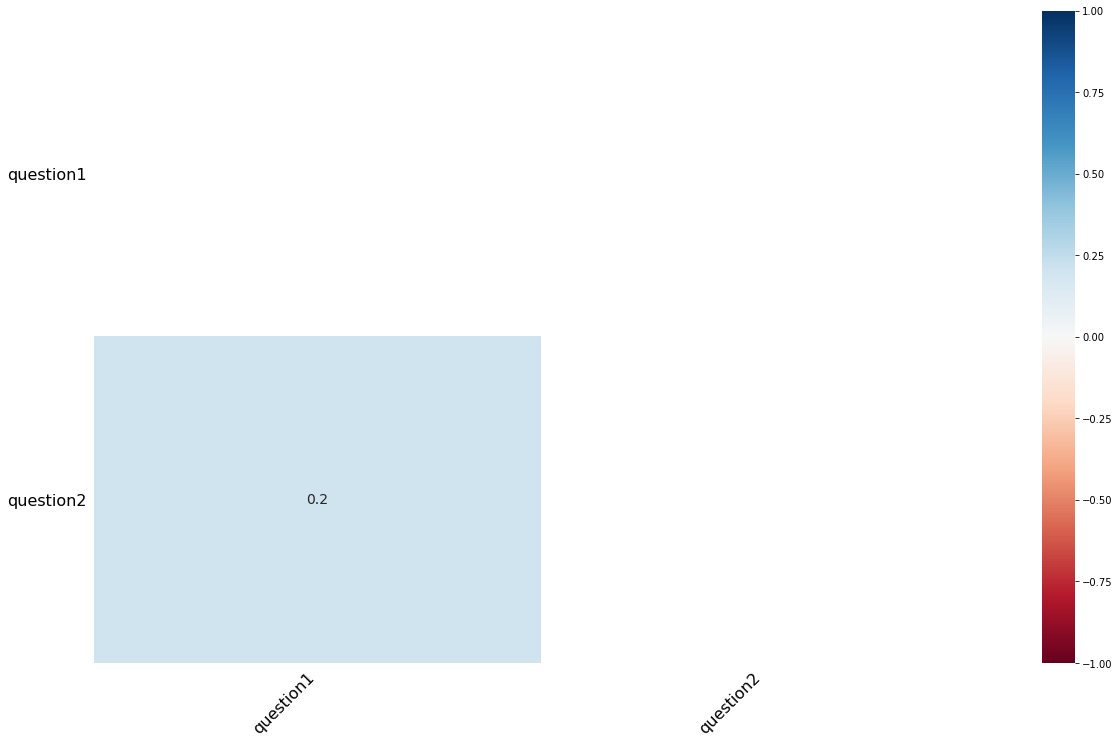

In [58]:
# plotting a seaborn heatmap visualization of nullity correlation
# in the dataframe before cleaning
fig = msno.heatmap(test_data)
fig_copy = fig.get_figure()
fig_copy.savefig('plots/quora_test_msno_heatmap_before.png',
                 bbox_inches='tight')
fig

In [59]:
# removing the missing or null values from the dataframe if exist
test_data = test_data[test_data.notna().all(axis=1)]
test_data

,question1,question2
0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,What but is the best way to send money from Ch...,What you send money to China?
3,Which food not emulsifiers?,What foods fibre?
4,"How ""aberystwyth"" start reading?",How their can I start reading?
...,...,...
3563470,How do Peaks (TV series): Why did Leland kill ...,What is the most study scene in twin peaks?
3563471,"What does be ""in transit"" mean on FedEx tracking?",How question FedEx packages delivered?
3563472,What are some famous Romanian drinks (alcoholi...,Can a non-alcoholic restaurant be a huge success?
3563473,What were the best and worst things about publ...,What are the best and worst things examination...


In [60]:
# number of rows after removing rows with any missing or null values
# in the dataframe
test_data.shape[0]

3563466

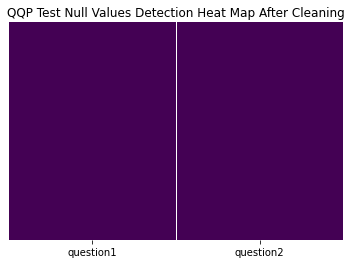

In [61]:
# plotting the heatmap for missing or null values in the dataframe
# after cleaning
sns.heatmap(test_data.isnull(),
            yticklabels=False,
            cbar=False,
            cmap='viridis')
plt.title('QQP Test Null Values Detection Heat Map After Cleaning')
plt.savefig('plots/quora_test_null_detection_heat_map_after.png',
            facecolor='white')
plt.show()

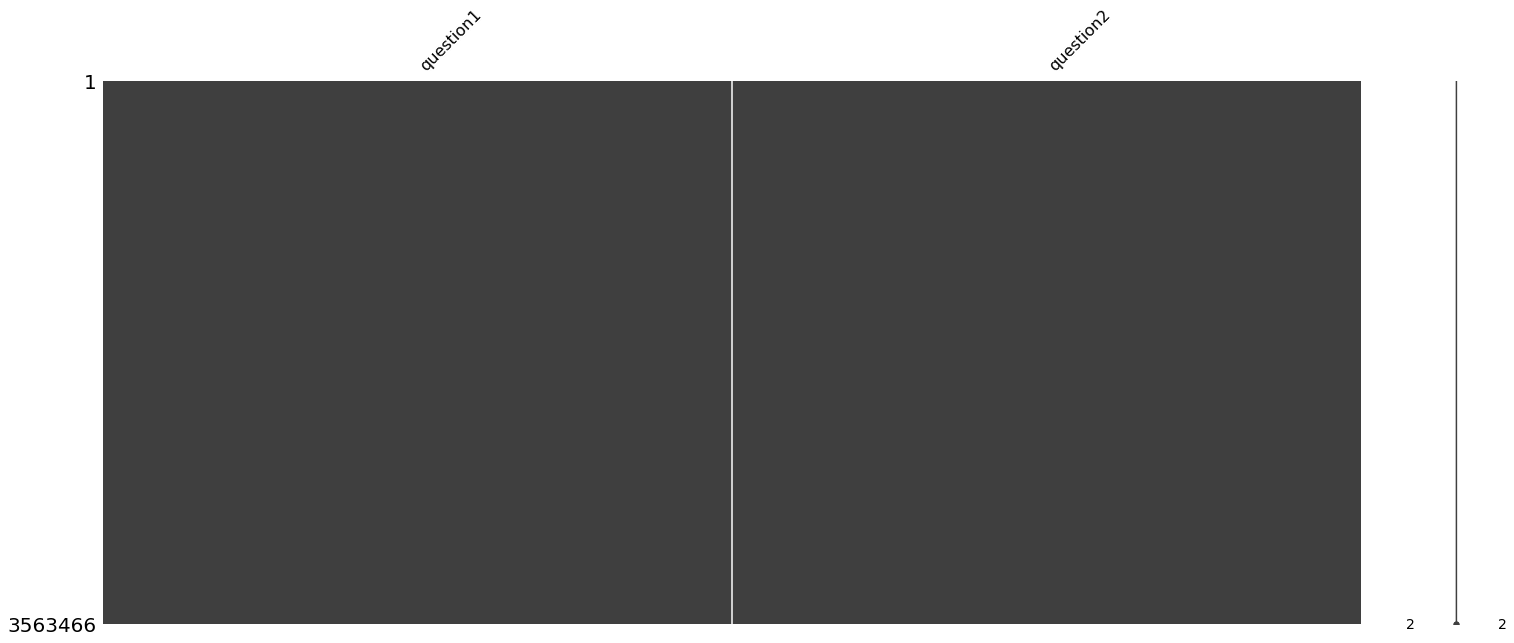

In [62]:
# plotting a matrix visualization of the nullity of the dataframe
# after cleaning
fig = msno.matrix(test_data)
fig_copy = fig.get_figure()
fig_copy.savefig('plots/quora_test_msno_matrix_after.png',
                 bbox_inches='tight')
fig

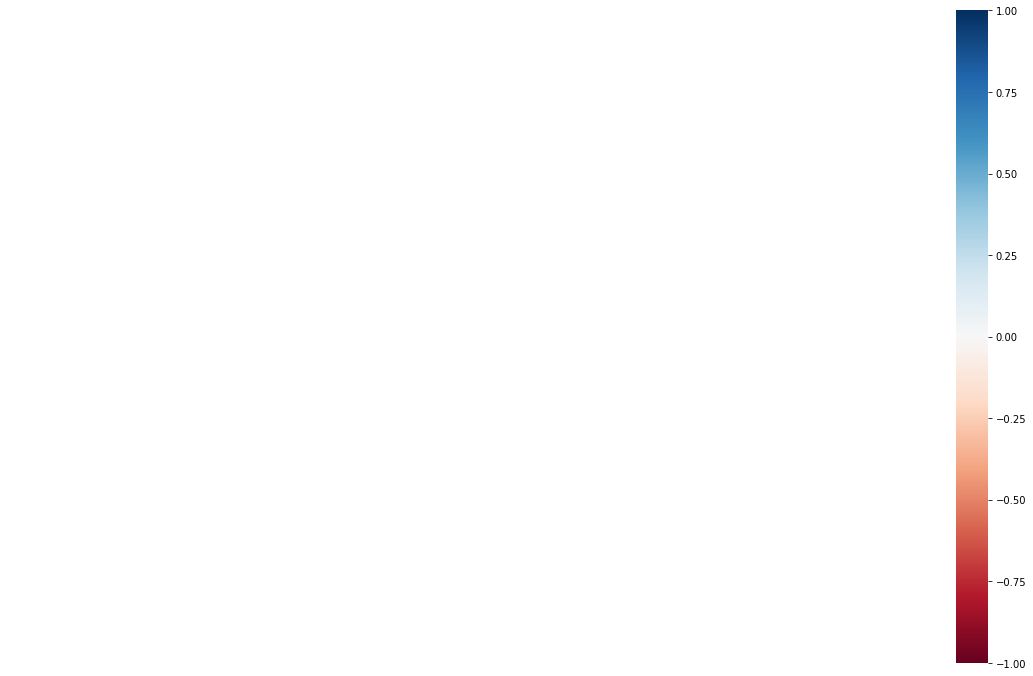

In [63]:
# plotting a seaborn heatmap visualization of nullity correlation
# in the dataframe after cleaning
fig = msno.heatmap(test_data)
fig_copy = fig.get_figure()
fig_copy.savefig('plots/quora_test_msno_heatmap_after.png',
                 bbox_inches='tight')
fig

In [64]:
# count of null values in question1 and question2 columns of the dataframe
test_data[['question1', 'question2']].isnull().sum()

question1    0
question2    0
dtype: int64

In [65]:
# checking the number of duplicate rows exist in the dataframe
# before cleaning
test_data.duplicated().sum()

1223073

In [66]:
# removing the duplicate rows from the dataframe if exist
test_data = test_data.drop_duplicates()

In [67]:
# checking the number of duplicate rows exist in the dataframe
# after cleaning
test_data.duplicated().sum()

0

In [68]:
# printing the dataframe
test_data

,question1,question2
0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,What but is the best way to send money from Ch...,What you send money to China?
3,Which food not emulsifiers?,What foods fibre?
4,"How ""aberystwyth"" start reading?",How their can I start reading?
...,...,...
2345791,How do Peaks (TV series): Why did Leland kill ...,What is the most study scene in twin peaks?
2345792,"What does be ""in transit"" mean on FedEx tracking?",How question FedEx packages delivered?
2345793,What are some famous Romanian drinks (alcoholi...,Can a non-alcoholic restaurant be a huge success?
2345794,What were the best and worst things about publ...,What are the best and worst things examination...


In [69]:
# printing a concise summary of the dataframe
# information such as index, data type, columns, non-null values,
# and memory usage
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2340393 entries, 0 to 2345795
Data columns (total 2 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   question1  object
 1   question2  object
dtypes: object(2)
memory usage: 53.6+ MB


In [70]:
# printing the columns of the dataframe
test_data.columns

Index(['question1', 'question2'], dtype='object')

In [71]:
# saving cleaned dataset to a csv file
file_name = 'processed_datasets/qqp_test_data_cleaned.csv'
test_data.to_csv(file_name,
                 encoding='utf-8',
                 index=False)

# loading dataset from the saved csv file to a pandas dataframe
test_data = pd.read_csv(file_name)

# printing the cleaned loaded dataframe
test_data

,question1,question2
0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,What but is the best way to send money from Ch...,What you send money to China?
3,Which food not emulsifiers?,What foods fibre?
4,"How ""aberystwyth"" start reading?",How their can I start reading?
...,...,...
2340388,How do Peaks (TV series): Why did Leland kill ...,What is the most study scene in twin peaks?
2340389,"What does be ""in transit"" mean on FedEx tracking?",How question FedEx packages delivered?
2340390,What are some famous Romanian drinks (alcoholi...,Can a non-alcoholic restaurant be a huge success?
2340391,What were the best and worst things about publ...,What are the best and worst things examination...


In [72]:
# importing re module
# used to support regular expressions
import re

In [73]:
# function to remove html tags from a given text
def remove_html(sentence):
    return re.sub(re.compile('<.*?>'), ' ', sentence)

In [74]:
# importing punctuations from collection of string constants
from string import punctuation

# printing defined punctuations
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [75]:
# function to remove punctuations from a given text
def remove_punctuation(sentence):
    return sentence.translate(str.maketrans(dict.fromkeys(punctuation)))

In [76]:
# function to replace specific contractions from a given text
def replace_specific_contractions(sentence):
    sentence = re.sub(r'won\'t', 'will not', sentence)
    sentence = re.sub(r'can\'t', 'can not', sentence)
    return sentence

In [77]:
# function to replace general contractions from a given text
def replace_general_contractions(sentence):
    sentence = re.sub(r'n\'t', ' not', sentence)
    sentence = re.sub(r'\'re', ' are', sentence)
    sentence = re.sub(r'\'s', ' is', sentence)
    sentence = re.sub(r'\'d', ' would', sentence)
    sentence = re.sub(r'\'ll', ' will', sentence)
    sentence = re.sub(r'\'t', ' not', sentence)
    sentence = re.sub(r'\'ve', ' have', sentence)
    sentence = re.sub(r'\'m', ' am', sentence)
    return sentence

In [78]:
# function to replace contractions from a given text
def replace_contractions(sentence):
    sentence = replace_specific_contractions(sentence)
    sentence = replace_general_contractions(sentence)
    return sentence

In [79]:
# importing Natural Language Toolkit which is a leading platform for
# building Python programs to work with human language data
import nltk

# nltk downloader to download all packages in nltk library
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

In [80]:
# importing english stopwords from nltk library
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

# printing number of defined english stopwords in nltk library
print(len(stop_words))

179


In [81]:
# printing few defined english stopwords in nltk library
print(stop_words[:60:5])

['i', 'our', "you've", 'yourself', 'himself', 'herself', 'they', 'what', 'that', 'is', 'been', 'having']


In [82]:
# function to remove english stopwords from a given set of tokens
def remove_stopwords(tokens):
    return [token for token in tokens if token not in stop_words]

In [83]:
# importing wordnet lemmatizer from nltk stem package
# used to remove morphological affixes from words, leaving only the word
# stem wordnet lemmatizer lemmatizes using built-in morphy function of
# wordnet
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

In [84]:
# function to convert a given toke to its lemma
def lemmatize_token(token):
    return lemmatizer.lemmatize(token)

In [85]:
# importing word tokenizer from nltk tokenizer package
# used for dividing strings into lists of substrings or tokens
from nltk.tokenize import word_tokenize

In [86]:
# function to preprocess a given text and return preprocessed set of
# tokens
def tokenize_text(text):
    text = str(text.lower())
    text = remove_html(text)
    text = remove_punctuation(text)
    text = replace_contractions(text)
    tokens = word_tokenize(text)
    tokens = remove_stopwords(tokens)
    return tokens

In [87]:
raw_text = '''   <h1>Hello World!</h1>  "How are you?.  I am doing
 $#fine...  Thank you very much!     '''
raw_text

'   <h1>Hello World!</h1>  "How are you?.  I am doing\n $#fine...  Thank you very much!     '

In [88]:
# testing the tokenizing of a text
print(tokenize_text(raw_text))

['hello', 'world', 'fine', 'thank', 'much']


In [89]:
# function to preprocess a given text
def preprocess_text(text):
    tokens = tokenize_text(text)
    q1 = ' '.join(str(lemmatize_token(token)) for token in tokens)
    q2 = ' '.join(str(token) for token in tokens)
    return q1, q2

In [90]:
# testing the preprocessing of a text
print(preprocess_text(raw_text))

('hello world fine thank much', 'hello world fine thank much')


In [91]:
# importing tqdm library
# used for printing a dynamically updating progressbar for an iterator
from tqdm import tqdm

In [92]:
cleaned_lemmatized_question_1 = []
cleaned_lemmatized_question_2 = []

cleaned_question_1 = []
cleaned_question_2 = []

combined_lemmatized_text = []

# preprocessing texts in question1 and question2 in train_data dataframe
for _, row in tqdm(train_data.iterrows()):
    clq1, cq1 = preprocess_text(row['question1'])
    clq2, cq2 = preprocess_text(row['question2'])

    cleaned_lemmatized_question_1.append(clq1)
    cleaned_question_1.append(cq1)

    cleaned_lemmatized_question_2.append(clq2)
    cleaned_question_2.append(cq2)

    combined_lemmatized_text.append(clq1 + ' ' + clq2)

404287it [03:55, 1714.54it/s]


In [93]:
cleaned_lemmatized_question_1_test = []
cleaned_lemmatized_question_2_test = []

cleaned_question_1_test = []
cleaned_question_2_test = []

combined_lemmatized_text_test = []

# preprocessing texts in question1 and question2 in test_data dataframe
for _, row in tqdm(test_data.iterrows()):
    clq1_test, cq1_test = preprocess_text(row['question1'])
    clq2_test, cq2_test = preprocess_text(row['question2'])

    cleaned_lemmatized_question_1_test.append(clq1_test)
    cleaned_question_1_test.append(cq1_test)

    cleaned_lemmatized_question_2_test.append(clq2_test)
    cleaned_question_2_test.append(cq2_test)

    combined_lemmatized_text_test.append(clq1_test + ' ' + clq2_test)

2340393it [22:50, 1707.79it/s]


In [94]:
test_data['question1'][test_data['question2'].isnull()]

Series([], Name: question1, dtype: object)

In [95]:
test_data['question2'][test_data['question1'].isnull()]

Series([], Name: question2, dtype: object)

In [96]:
# printing the test_data dataframe
test_data

,question1,question2
0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,What but is the best way to send money from Ch...,What you send money to China?
3,Which food not emulsifiers?,What foods fibre?
4,"How ""aberystwyth"" start reading?",How their can I start reading?
...,...,...
2340388,How do Peaks (TV series): Why did Leland kill ...,What is the most study scene in twin peaks?
2340389,"What does be ""in transit"" mean on FedEx tracking?",How question FedEx packages delivered?
2340390,What are some famous Romanian drinks (alcoholi...,Can a non-alcoholic restaurant be a huge success?
2340391,What were the best and worst things about publ...,What are the best and worst things examination...


In [97]:
# length of the created lists of train_data dataframe
print(len(cleaned_lemmatized_question_1))
print(len(cleaned_lemmatized_question_2))
print(len(cleaned_question_1))
print(len(cleaned_question_2))
print(len(combined_lemmatized_text))

404287
404287
404287
404287
404287


In [98]:
# length of the created lists of test_data dataframe
print(len(cleaned_lemmatized_question_1_test))
print(len(cleaned_lemmatized_question_2_test))
print(len(cleaned_question_1_test))
print(len(cleaned_question_2_test))
print(len(combined_lemmatized_text_test))

2340393
2340393
2340393
2340393
2340393


In [99]:
# inserting new preprocessed text columns for train_data dataframe
train_data['cleaned_lemmatized_question_1'] = cleaned_lemmatized_question_1
train_data['cleaned_lemmatized_question_2'] = cleaned_lemmatized_question_2
train_data['cleaned_question_1'] = cleaned_question_1
train_data['cleaned_question_2'] = cleaned_question_2
train_data['combined_lemmatized_text'] = combined_lemmatized_text

# printing the dataframe
train_data

,question1,question2,is_duplicate,cleaned_lemmatized_question_1,cleaned_lemmatized_question_2,cleaned_question_1,cleaned_question_2,combined_lemmatized_text
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,step step guide invest share market india,step step guide invest share market,step step guide invest share market india,step step guide invest share market,step step guide invest share market india step...
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,story kohinoor kohinoor diamond,would happen indian government stole kohinoor ...,story kohinoor kohinoor diamond,would happen indian government stole kohinoor ...,story kohinoor kohinoor diamond would happen i...
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,increase speed internet connection using vpn,internet speed increased hacking dns,increase speed internet connection using vpn,internet speed increased hacking dns,increase speed internet connection using vpn i...
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,mentally lonely solve,find remainder math2324math divided 2423,mentally lonely solve,find remainder math2324math divided 2423,mentally lonely solve find remainder math2324m...
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,one dissolve water quikly sugar salt methane c...,fish would survive salt water,one dissolve water quikly sugar salt methane c...,fish would survive salt water,one dissolve water quikly sugar salt methane c...
...,...,...,...,...,...,...,...,...
404282,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0,many keywords racket programming language late...,many keywords perl programming language latest...,many keywords racket programming language late...,many keywords perl programming language latest...,many keywords racket programming language late...
404283,Do you believe there is life after death?,Is it true that there is life after death?,1,believe life death,true life death,believe life death,true life death,believe life death true life death
404284,What is one coin?,What's this coin?,0,one coin,whats coin,one coin,whats coin,one coin whats coin
404285,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0,approx annual cost living studying uic chicago...,little hairfall problem want use hair styling ...,approx annual cost living studying uic chicago...,little hairfall problem want use hair styling ...,approx annual cost living studying uic chicago...


In [100]:
# inserting new preprocessed text columns for test_data dataframe
test_data['cleaned_lemmatized_question_1_test'] = cleaned_lemmatized_question_1_test
test_data['cleaned_lemmatized_question_2_test'] = cleaned_lemmatized_question_2_test
test_data['cleaned_question_1_test'] = cleaned_question_1_test
test_data['cleaned_question_2_test'] = cleaned_question_2_test
test_data['combined_lemmatized_text_test'] = combined_lemmatized_text_test

# printing the dataframe
test_data

,question1,question2,cleaned_lemmatized_question_1_test,cleaned_lemmatized_question_2_test,cleaned_question_1_test,cleaned_question_2_test,combined_lemmatized_text_test
0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...,surface pro 4 compare ipad pro,microsoft choose core m3 core i3 home surface ...,surface pro 4 compare ipad pro,microsoft choose core m3 core i3 home surface ...,surface pro 4 compare ipad pro microsoft choos...
1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?,hair transplant age 24 much would cost,much cost hair transplant require,hair transplant age 24 much would cost,much cost hair transplant require,hair transplant age 24 much would cost much co...
2,What but is the best way to send money from Ch...,What you send money to China?,best way send money china u,send money china,best way send money china us,send money china,best way send money china u send money china
3,Which food not emulsifiers?,What foods fibre?,food emulsifier,food fibre,food emulsifiers,foods fibre,food emulsifier food fibre
4,"How ""aberystwyth"" start reading?",How their can I start reading?,aberystwyth start reading,start reading,aberystwyth start reading,start reading,aberystwyth start reading start reading
...,...,...,...,...,...,...,...
2340388,How do Peaks (TV series): Why did Leland kill ...,What is the most study scene in twin peaks?,peak tv series leland kill laura palmer,study scene twin peak,peaks tv series leland kill laura palmer,study scene twin peaks,peak tv series leland kill laura palmer study ...
2340389,"What does be ""in transit"" mean on FedEx tracking?",How question FedEx packages delivered?,transit mean fedex tracking,question fedex package delivered,transit mean fedex tracking,question fedex packages delivered,transit mean fedex tracking question fedex pac...
2340390,What are some famous Romanian drinks (alcoholi...,Can a non-alcoholic restaurant be a huge success?,famous romanian drink alcoholic nonalcoholic,nonalcoholic restaurant huge success,famous romanian drinks alcoholic nonalcoholic,nonalcoholic restaurant huge success,famous romanian drink alcoholic nonalcoholic n...
2340391,What were the best and worst things about publ...,What are the best and worst things examination...,best worst thing public transit proddatur andh...,best worst thing examination public transit vi...,best worst things public transit proddatur and...,best worst things examination public transit v...,best worst thing public transit proddatur andh...


In [101]:
# saving preprocessed train dataset to a csv file
file_name = 'processed_datasets/qqp_train_data_preprocessed.csv'
train_data.to_csv(file_name,
                  encoding='utf-8',
                  index=False)

# loading dataset from the saved csv file to a pandas dataframe
train_data = pd.read_csv(file_name)

# printing the preprocessed loaded dataframe
train_data

,question1,question2,is_duplicate,cleaned_lemmatized_question_1,cleaned_lemmatized_question_2,cleaned_question_1,cleaned_question_2,combined_lemmatized_text
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,step step guide invest share market india,step step guide invest share market,step step guide invest share market india,step step guide invest share market,step step guide invest share market india step...
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,story kohinoor kohinoor diamond,would happen indian government stole kohinoor ...,story kohinoor kohinoor diamond,would happen indian government stole kohinoor ...,story kohinoor kohinoor diamond would happen i...
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,increase speed internet connection using vpn,internet speed increased hacking dns,increase speed internet connection using vpn,internet speed increased hacking dns,increase speed internet connection using vpn i...
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,mentally lonely solve,find remainder math2324math divided 2423,mentally lonely solve,find remainder math2324math divided 2423,mentally lonely solve find remainder math2324m...
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,one dissolve water quikly sugar salt methane c...,fish would survive salt water,one dissolve water quikly sugar salt methane c...,fish would survive salt water,one dissolve water quikly sugar salt methane c...
...,...,...,...,...,...,...,...,...
404282,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0,many keywords racket programming language late...,many keywords perl programming language latest...,many keywords racket programming language late...,many keywords perl programming language latest...,many keywords racket programming language late...
404283,Do you believe there is life after death?,Is it true that there is life after death?,1,believe life death,true life death,believe life death,true life death,believe life death true life death
404284,What is one coin?,What's this coin?,0,one coin,whats coin,one coin,whats coin,one coin whats coin
404285,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0,approx annual cost living studying uic chicago...,little hairfall problem want use hair styling ...,approx annual cost living studying uic chicago...,little hairfall problem want use hair styling ...,approx annual cost living studying uic chicago...


In [102]:
# saving preprocessed test dataset to a csv file
file_name = 'processed_datasets/qqp_test_data_preprocessed.csv'
test_data.to_csv(file_name,
                 encoding='utf-8',
                 index=False)

# loading dataset from the saved csv file to a pandas dataframe
test_data = pd.read_csv(file_name)

# printing the preprocessed loaded dataframe
test_data

,question1,question2,cleaned_lemmatized_question_1_test,cleaned_lemmatized_question_2_test,cleaned_question_1_test,cleaned_question_2_test,combined_lemmatized_text_test
0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...,surface pro 4 compare ipad pro,microsoft choose core m3 core i3 home surface ...,surface pro 4 compare ipad pro,microsoft choose core m3 core i3 home surface ...,surface pro 4 compare ipad pro microsoft choos...
1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?,hair transplant age 24 much would cost,much cost hair transplant require,hair transplant age 24 much would cost,much cost hair transplant require,hair transplant age 24 much would cost much co...
2,What but is the best way to send money from Ch...,What you send money to China?,best way send money china u,send money china,best way send money china us,send money china,best way send money china u send money china
3,Which food not emulsifiers?,What foods fibre?,food emulsifier,food fibre,food emulsifiers,foods fibre,food emulsifier food fibre
4,"How ""aberystwyth"" start reading?",How their can I start reading?,aberystwyth start reading,start reading,aberystwyth start reading,start reading,aberystwyth start reading start reading
...,...,...,...,...,...,...,...
2340388,How do Peaks (TV series): Why did Leland kill ...,What is the most study scene in twin peaks?,peak tv series leland kill laura palmer,study scene twin peak,peaks tv series leland kill laura palmer,study scene twin peaks,peak tv series leland kill laura palmer study ...
2340389,"What does be ""in transit"" mean on FedEx tracking?",How question FedEx packages delivered?,transit mean fedex tracking,question fedex package delivered,transit mean fedex tracking,question fedex packages delivered,transit mean fedex tracking question fedex pac...
2340390,What are some famous Romanian drinks (alcoholi...,Can a non-alcoholic restaurant be a huge success?,famous romanian drink alcoholic nonalcoholic,nonalcoholic restaurant huge success,famous romanian drinks alcoholic nonalcoholic,nonalcoholic restaurant huge success,famous romanian drink alcoholic nonalcoholic n...
2340391,What were the best and worst things about publ...,What are the best and worst things examination...,best worst thing public transit proddatur andh...,best worst thing examination public transit vi...,best worst things public transit proddatur and...,best worst things examination public transit v...,best worst thing public transit proddatur andh...


In [103]:
# displaying the dimensionality of the dataframe
train_data.shape

(404287, 8)

In [104]:
# displaying the dimensionality of the dataframe
test_data.shape

(2340393, 7)

In [105]:
# printing a concise summary of the dataframe
# information such as index, data type, columns, non-null values,
# and memory usage
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404287 entries, 0 to 404286
Data columns (total 8 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   question1                      404287 non-null  object
 1   question2                      404287 non-null  object
 2   is_duplicate                   404287 non-null  int64 
 3   cleaned_lemmatized_question_1  404208 non-null  object
 4   cleaned_lemmatized_question_2  404221 non-null  object
 5   cleaned_question_1             404208 non-null  object
 6   cleaned_question_2             404221 non-null  object
 7   combined_lemmatized_text       404287 non-null  object
dtypes: int64(1), object(7)
memory usage: 24.7+ MB


In [106]:
# printing a concise summary of the dataframe
# information such as index, data type, columns, non-null values,
# and memory usage
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340393 entries, 0 to 2340392
Data columns (total 7 columns):
 #   Column                              Dtype 
---  ------                              ----- 
 0   question1                           object
 1   question2                           object
 2   cleaned_lemmatized_question_1_test  object
 3   cleaned_lemmatized_question_2_test  object
 4   cleaned_question_1_test             object
 5   cleaned_question_2_test             object
 6   combined_lemmatized_text_test       object
dtypes: object(7)
memory usage: 125.0+ MB


In [107]:
# importing train_test_split from scikit-learn library
from sklearn.model_selection import train_test_split

In [108]:
# splitting data into random train and test subsets
# train set - 80%, test set - 20%
# when random_state set to an int, train_test_split will return same
# results for each execution
X_temp, X_test, y_temp, y_test = train_test_split(train_data[['cleaned_question_1', 'cleaned_question_2']],
                                                  train_data['is_duplicate'],
                                                  test_size=0.2,
                                                  random_state=42)

In [109]:
X_temp

,cleaned_question_1,cleaned_question_2
174949,india job options future options low cgpa grad...,jobs careers india currently third year engine...
119442,worlds best romantic movie,best romantic movie time
252941,best place live hyderabad,best place live hyderabad mumbai
13551,athlete month,shop act licence
274896,learn code wordpress,much time learn code wordpress website
...,...,...
259178,power positive thinking,cultivate power positive thinking
365838,things new employees know going first day tennant,things new employees know going first day att
131932,currently winning presidential election,biases aside point time think win presidential...
146867,telugutamilhindi movies leading actor becomes ...,fix internet connection available problem mobi...


In [110]:
X_test

,cleaned_question_1,cleaned_question_2
8067,play pokémon go korea,play pokémon go china
224277,breathing treatment help cough,help someone unconscious still breathing
252450,kellyanne conway annoying opinion,kellyanne conway really imply pay attention wo...
174038,rate 110 review maruti baleno,career options one completing bachelors degree...
384860,good books marketing,best books ever written marketing
...,...,...
37520,reason behind sudden end white collar tv show,favorite tv show ends
75814,ever sex car,toip professors artificial intelligence canadi...
79271,recent research ideas convex hull problem,indian feel controversial answers written niri...
25953,choose reading either fiction nonfiction rest ...,choose one fiction one nonfiction book read re...


In [111]:
y_temp

174949    0
119442    1
252941    0
13551     0
274896    1
         ..
259178    0
365838    0
131932    1
146867    0
121958    0
Name: is_duplicate, Length: 323429, dtype: int64

In [112]:
y_test

8067      0
224277    0
252450    0
174038    0
384860    1
         ..
37520     0
75814     0
79271     0
25953     0
99888     0
Name: is_duplicate, Length: 80858, dtype: int64

In [113]:
# splitting data into random train and test subsets
# train set - 80%, test set - 20%
# when random_state set to an int, train_test_split will return same
# results for each execution
X_train, X_val, y_train, y_val = train_test_split(X_temp,
                                                  y_temp,
                                                  test_size=0.2,
                                                  random_state=42)

In [114]:
X_train

,cleaned_question_1,cleaned_question_2
217906,find uncut uncensored fifty shades grey movie ...,whats best way see fifty shades grey streaming
103880,quora iphone app way see list questions youve ...,filter content see questions asked quora app
252874,college applications take get uc berkeley ucla...,much score take sats sat 2 precise get scholar...
166261,iit best aeronautical engineering,progress civildroftman civilengineer
146339,legality behind copying pasting news story cnn...,legal copy news sites
...,...,...
1743,neoliberals big corporations feel entitled fre...,hedge fund managers pay commission brokerage f...
220095,forever 21 popular clothing brand america,well made clothes sold forever 21
219754,donald trump wins presidency would,donald trump became president would
240865,australia fm deny legitimacy tribunal australi...,tribunal league legends inefficient


In [115]:
X_val

,cleaned_question_1,cleaned_question_2
238573,inventions renaissance regarding science,inventions renaissance regarding art
55283,instacart get yc two months program started ap...,hurt wait submit yc app right deadline
168649,bipolar things stay awake,bipolar things stay night
375324,best splunk video tutorials,splunk successful
180641,make sequence diagram library management system,case diagram library management system used
...,...,...
364924,periyar ev ramasamy,historical achievements periyar ev ramasamy
183543,foreigners think narendra modi,nonindians think narendra modi
155427,start photography hobby buy beginner dslr peop...,beginner photography started dslr couple month...
76184,didnt evgeni plushenko win 2010 winter olympic...,anyone ever killed someone using olympic gold ...


In [116]:
y_train

217906    0
103880    0
252874    0
166261    0
146339    0
         ..
1743      0
220095    0
219754    1
240865    0
364361    0
Name: is_duplicate, Length: 258743, dtype: int64

In [117]:
y_val

238573    0
55283     0
168649    1
375324    0
180641    0
         ..
364924    0
183543    1
155427    0
76184     0
355159    1
Name: is_duplicate, Length: 64686, dtype: int64

In [118]:
X_train['text'] = X_train[['cleaned_question_1', 'cleaned_question_2']].apply(lambda x: str(x[0]) + ' ' + str(x[1]),
                                                                              axis=1)
X_train

,cleaned_question_1,cleaned_question_2,text
217906,find uncut uncensored fifty shades grey movie ...,whats best way see fifty shades grey streaming,find uncut uncensored fifty shades grey movie ...
103880,quora iphone app way see list questions youve ...,filter content see questions asked quora app,quora iphone app way see list questions youve ...
252874,college applications take get uc berkeley ucla...,much score take sats sat 2 precise get scholar...,college applications take get uc berkeley ucla...
166261,iit best aeronautical engineering,progress civildroftman civilengineer,iit best aeronautical engineering progress civ...
146339,legality behind copying pasting news story cnn...,legal copy news sites,legality behind copying pasting news story cnn...
...,...,...,...
1743,neoliberals big corporations feel entitled fre...,hedge fund managers pay commission brokerage f...,neoliberals big corporations feel entitled fre...
220095,forever 21 popular clothing brand america,well made clothes sold forever 21,forever 21 popular clothing brand america well...
219754,donald trump wins presidency would,donald trump became president would,donald trump wins presidency would donald trum...
240865,australia fm deny legitimacy tribunal australi...,tribunal league legends inefficient,australia fm deny legitimacy tribunal australi...


In [119]:
# importing Tokenizer from keras library
# keras is a high-level api of tensorflow
# keras.preprocessing.text provides keras data preprocessing utils
# to pre-process datasets with textual data before they are fed to the
# machine learning model
from keras.preprocessing.text import Tokenizer

# Tokenizer allows to vectorize a text corpus, by turning each text into
# either a sequence of integers (each integer being the index of a token
# in a dictionary) or into a vector where the coefficient for each token
# could be binary, based on word count, based on tf-idf
tokenizer = Tokenizer()

In [120]:
# updates internal vocabulary based on a list of texts
# required before using texts_to_sequences
tokenizer.fit_on_texts(X_train['text'].values)

In [121]:
# changing data type of a pandas series to string
X_train['cleaned_question_1'] = X_train['cleaned_question_1'].astype(str)
X_train['cleaned_question_2'] = X_train['cleaned_question_2'].astype(str)

# displaying the dataframe
X_train

,cleaned_question_1,cleaned_question_2,text
217906,find uncut uncensored fifty shades grey movie ...,whats best way see fifty shades grey streaming,find uncut uncensored fifty shades grey movie ...
103880,quora iphone app way see list questions youve ...,filter content see questions asked quora app,quora iphone app way see list questions youve ...
252874,college applications take get uc berkeley ucla...,much score take sats sat 2 precise get scholar...,college applications take get uc berkeley ucla...
166261,iit best aeronautical engineering,progress civildroftman civilengineer,iit best aeronautical engineering progress civ...
146339,legality behind copying pasting news story cnn...,legal copy news sites,legality behind copying pasting news story cnn...
...,...,...,...
1743,neoliberals big corporations feel entitled fre...,hedge fund managers pay commission brokerage f...,neoliberals big corporations feel entitled fre...
220095,forever 21 popular clothing brand america,well made clothes sold forever 21,forever 21 popular clothing brand america well...
219754,donald trump wins presidency would,donald trump became president would,donald trump wins presidency would donald trum...
240865,australia fm deny legitimacy tribunal australi...,tribunal league legends inefficient,australia fm deny legitimacy tribunal australi...


In [122]:
# changing data type of a pandas series to string
X_val['cleaned_question_1'] = X_val['cleaned_question_1'].astype(str)
X_val['cleaned_question_2'] = X_val['cleaned_question_2'].astype(str)

# displaying the dataframe
X_val

,cleaned_question_1,cleaned_question_2
238573,inventions renaissance regarding science,inventions renaissance regarding art
55283,instacart get yc two months program started ap...,hurt wait submit yc app right deadline
168649,bipolar things stay awake,bipolar things stay night
375324,best splunk video tutorials,splunk successful
180641,make sequence diagram library management system,case diagram library management system used
...,...,...
364924,periyar ev ramasamy,historical achievements periyar ev ramasamy
183543,foreigners think narendra modi,nonindians think narendra modi
155427,start photography hobby buy beginner dslr peop...,beginner photography started dslr couple month...
76184,didnt evgeni plushenko win 2010 winter olympic...,anyone ever killed someone using olympic gold ...


In [123]:
# changing data type of a pandas series to string
X_test['cleaned_question_1'] = X_test['cleaned_question_1'].astype(str)
X_test['cleaned_question_2'] = X_test['cleaned_question_2'].astype(str)

# displaying the dataframe
X_test

,cleaned_question_1,cleaned_question_2
8067,play pokémon go korea,play pokémon go china
224277,breathing treatment help cough,help someone unconscious still breathing
252450,kellyanne conway annoying opinion,kellyanne conway really imply pay attention wo...
174038,rate 110 review maruti baleno,career options one completing bachelors degree...
384860,good books marketing,best books ever written marketing
...,...,...
37520,reason behind sudden end white collar tv show,favorite tv show ends
75814,ever sex car,toip professors artificial intelligence canadi...
79271,recent research ideas convex hull problem,indian feel controversial answers written niri...
25953,choose reading either fiction nonfiction rest ...,choose one fiction one nonfiction book read re...


In [124]:
# transforms each text to a sequence of integers

x_train_question_1_sequence = tokenizer.texts_to_sequences(X_train['cleaned_question_1'].values)
x_train_question_2_sequence = tokenizer.texts_to_sequences(X_train['cleaned_question_2'].values)

x_val_question_1_sequence = tokenizer.texts_to_sequences(X_val['cleaned_question_1'].values)
x_val_question_2_sequence = tokenizer.texts_to_sequences(X_val['cleaned_question_2'].values)

x_test_question_1_sequence = tokenizer.texts_to_sequences(X_test['cleaned_question_1'].values)
x_test_question_2_sequence = tokenizer.texts_to_sequences(X_test['cleaned_question_2'].values)

In [125]:
# printing train features dataframe first row question 1 column for
# visualization purposes
print(X_train['cleaned_question_1'].values[0])
print(x_train_question_1_sequence[0])

find uncut uncensored fifty shades grey movie online
[29, 12510, 16986, 8490, 5804, 2755, 81, 35]


In [126]:
# lengths of each generated sequences of integers in train features
# dataframe question 1 column
length_of_sequence = [len(sequence) for sequence in x_train_question_1_sequence]

# printing the train features dataframe first row question 1 column length
length_of_sequence[0]

8

In [127]:
# importing numpy library
# used to perform fast mathematical operations over python arrays
# and lists
import numpy as np

# maximum length of a sequence in the train features dataframe
# question 1 column
np.max(length_of_sequence)

54

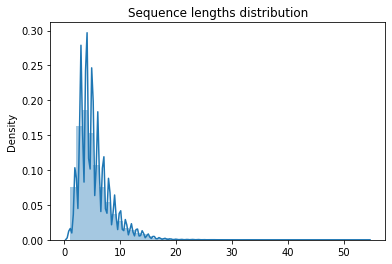

In [128]:
# plot a univariate distribution of observations for sequence lengths
sns.distplot(length_of_sequence)
plt.title('Sequence lengths distribution')
plt.savefig('plots/length_of_sequence.png',
            facecolor='white')
plt.show()

In [129]:
# importing utilities for preprocessing sequence data from
# keras library
from keras.preprocessing.sequence import pad_sequences

# defining a maximum sequence length based on the distribution
# plot observations
maximum_sequence_length = 30

In [130]:
# pad_sequences pads sequences to the same length
# padding='post' to pad after each sequence

x_train_question_1_sequence = pad_sequences(x_train_question_1_sequence,
                                            maxlen=maximum_sequence_length,
                                            padding='post')

x_train_question_2_sequence = pad_sequences(x_train_question_2_sequence,
                                            maxlen=maximum_sequence_length,
                                            padding='post')

x_test_question_1_sequence = pad_sequences(x_test_question_1_sequence,
                                           maxlen=maximum_sequence_length,
                                           padding='post')

x_test_question_2_sequence = pad_sequences(x_test_question_2_sequence,
                                           maxlen=maximum_sequence_length,
                                           padding='post')

In [131]:
# printing train features dataframe first row question 1 column for
# visualization purposes
x_train_question_1_sequence[0]

array([   29, 12510, 16986,  8490,  5804,  2755,    81,    35,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0], dtype=int32)

In [132]:
# lengths of each generated sequences of integers in train features
# dataframe question 2 column
length_of_sequence = [len(sequence) for sequence in x_train_question_2_sequence]

# printing the train features dataframe first row question 2 column length
length_of_sequence[0]

30

In [133]:
# maximum and minimum length of a sequence in the train features dataframe
# question 2 column
print(np.max(length_of_sequence))
print(np.min(length_of_sequence))

30
30


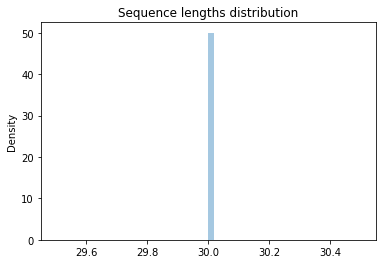

In [134]:
# plot a univariate distribution of observations for sequence lengths
sns.distplot(length_of_sequence)
plt.title('Sequence lengths distribution')
plt.savefig('plots/length_of_sequence_after.png',
            facecolor='white')
plt.show()

In [135]:
# printing the train features dataframe first row question 1 column length

print(len(x_train_question_1_sequence[0]))
print(len(x_train_question_2_sequence[0]))

print(len(x_val_question_1_sequence[0]))
print(len(x_val_question_2_sequence[0]))

print(len(x_test_question_1_sequence[0]))
print(len(x_test_question_2_sequence[0]))

30
30
4
4
30
30


In [136]:
# fourth row of train features dataframe
print(X_train.iloc[3,], end='\n\n')
print(X_train.iloc[3,]['cleaned_question_1'])
print(X_train.iloc[3,]['cleaned_question_2'])

cleaned_question_1                    iit best aeronautical engineering
cleaned_question_2                 progress civildroftman civilengineer
text                  iit best aeronautical engineering progress civ...
Name: 166261, dtype: object

iit best aeronautical engineering
progress civildroftman civilengineer


In [137]:
# fourth row of train target dataframe
# 0 - not duplicate
# 1 - duplicate
y_train.iloc[3,]

0

In [138]:
# sequence for fourth row of train features dataframe question 1 column
x_train_question_1_sequence[3]

array([ 483,    1, 7365,   59,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0], dtype=int32)

In [139]:
# sequence for fourth row of train features dataframe question 2 column
x_train_question_2_sequence[3]

array([ 3663, 47112, 47113,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0], dtype=int32)

In [140]:
# ninth row of train features dataframe
print(X_train.iloc[8,], end='\n\n')
print(X_train.iloc[8,]['cleaned_question_1'])
print(X_train.iloc[8,]['cleaned_question_2'])

cleaned_question_1                  people keep black money swiss banks
cleaned_question_2                 black money kept swiss bank accounts
text                  people keep black money swiss banks black mone...
Name: 185877, dtype: object

people keep black money swiss banks
black money kept swiss bank accounts


In [141]:
# ninth row of train target dataframe
# 0 - not duplicate
# 1 - duplicate
y_train.iloc[8,]

1

In [142]:
# sequence for ninth row of train features dataframe question 1 column
x_train_question_1_sequence[8]

array([   4,  264,   86,   13, 3382, 1125,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0], dtype=int32)

In [143]:
# sequence for ninth row of train features dataframe question 2 column
x_train_question_2_sequence[8]

array([  86,   13, 2501, 3382,  190,  905,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0], dtype=int32)

In [144]:
# declaring word_vectors dictionary
word_vectors = dict()

# GloVe is an unsupervised learning algorithm for obtaining vector
# representations for words
# Training is performed on aggregated global word-word co-occurrence
# statistics from a corpus
# Resulting representations show interesting linear substructures of
# the word vector space
# This dataset contains English word vectors pre-trained on the
# combined Wikipedia corpora
# GloVe embeddings use these pre-trained embeddings to quantify
# word co-occurrence
# GloVe embeddings capture some aspects of word meaning
filename = 'glove.6B.300d.txt'

# opening text file with glove embeddings
file = open(filename,
            encoding='utf8')

# reading the file line by line
# tokenizing each line into tokens
# adding data to word_vectors dictionary
for line in file:
    tokens = line.split()
    word_vectors[tokens[0]] = np.asarray(tokens[1:],
                                         dtype='float32')

# closing the file
file.close()

In [145]:
# importing islice method from itertools library
# itertools provides functional tools for creating and using iterators
from itertools import islice

# returning an iterator whose next() method returns selected values
# from an iterable
list(islice(word_vectors.keys(), 15))

['the',
 ',',
 '.',
 'of',
 'to',
 'and',
 'in',
 'a',
 '"',
 "'s",
 'for',
 '-',
 'that',
 'on',
 'is']

In [146]:
# length of word vector for the word 'hello'
len(word_vectors['hello'])

300

In [147]:
# printing word vector for the word 'hello'
word_vectors['hello']

array([-3.3712e-01, -2.1691e-01, -6.6365e-03, -4.1625e-01, -1.2555e+00,
       -2.8466e-02, -7.2195e-01, -5.2887e-01,  7.2085e-03,  3.1997e-01,
        2.9425e-02, -1.3236e-02,  4.3511e-01,  2.5716e-01,  3.8995e-01,
       -1.1968e-01,  1.5035e-01,  4.4762e-01,  2.8407e-01,  4.9339e-01,
        6.2826e-01,  2.2888e-01, -4.0385e-01,  2.7364e-02,  7.3679e-03,
        1.3995e-01,  2.3346e-01,  6.8122e-02,  4.8422e-01, -1.9578e-02,
       -5.4751e-01, -5.4983e-01, -3.4091e-02,  8.0017e-03, -4.3065e-01,
       -1.8969e-02, -8.5670e-02, -8.1123e-01, -2.1080e-01,  3.7784e-01,
       -3.5046e-01,  1.3684e-01, -5.5661e-01,  1.6835e-01, -2.2952e-01,
       -1.6184e-01,  6.7345e-01, -4.6597e-01, -3.1834e-02, -2.6037e-01,
       -1.7797e-01,  1.9436e-02,  1.0727e-01,  6.6534e-01, -3.4836e-01,
        4.7833e-02,  1.6440e-01,  1.4088e-01,  1.9204e-01, -3.5009e-01,
        2.6236e-01,  1.7626e-01, -3.1367e-01,  1.1709e-01,  2.0378e-01,
        6.1775e-01,  4.9075e-01, -7.5210e-02, -1.1815e-01,  1.86

In [148]:
# calculating vocabulary_size using word_index of
# keras.preprocessing.text.Tokenizer
vocabulary_size = len(tokenizer.word_index) + 1
vocabulary_size

87654

In [149]:
# printing length of word_vectors dictionary
len(word_vectors)

400000

In [150]:
# initializing the embedding_matrix
embedding_matrix = np.zeros((vocabulary_size,
                             len(word_vectors['hello'])))
embedding_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [151]:
# printing the shape of embedding_matrix
embedding_matrix.shape

(87654, 300)

In [152]:
embedding_vector = None
absent_words = []

# adding values to embedding_matrix
for word, index in tokenizer.word_index.items():
    if word in word_vectors.keys():
        embedding_vector = word_vectors.get(word)
    else:
        absent_words.append(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector
    else:
        embedding_matrix[index] = np.zeros(300)

In [153]:
# printing the length of absent_words
len(absent_words)

34346

In [154]:
# printing embedding_vector
embedding_vector

array([ 0.038226 , -0.0039415,  0.51367  ,  0.43576  ,  0.49218  ,
       -0.33497  ,  0.43634  ,  0.45152  , -0.08108  ,  0.48515  ,
       -0.59998  ,  0.39817  , -0.096727 ,  0.1836   ,  0.73763  ,
       -0.38836  ,  0.3311   , -0.061233 ,  0.51514  , -0.026119 ,
       -0.30278  , -0.28546  , -0.49018  , -0.07449  ,  0.57513  ,
       -0.045253 ,  0.035329 , -0.086013 ,  0.22468  ,  0.65506  ,
       -0.2017   , -0.095853 , -0.072084 , -0.42677  ,  0.40106  ,
       -0.72827  , -0.25888  , -0.32618  ,  0.32697  ,  0.041463 ,
       -0.25851  ,  0.41067  ,  0.4824   , -0.29718  , -0.0016525,
        0.44883  ,  0.24013  ,  0.45171  , -0.33867  ,  0.018999 ,
       -0.36552  ,  0.068266 ,  0.62777  ,  0.3989   ,  0.10577  ,
        0.13839  , -0.3783   ,  0.035453 , -0.0084163,  0.6266   ,
        0.26298  ,  0.19102  , -0.73734  ,  0.21556  ,  0.026598 ,
        0.42748  ,  0.14089  , -0.27273  ,  0.14993  ,  1.0024   ,
        0.26945  , -0.006764 ,  0.10014  ,  0.43996  ,  0.6236

In [155]:
# printing the shape of embedding_vector
embedding_vector.shape

(300,)

In [156]:
# printing embedding_matrix
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.089135  ,  0.71792001,  0.028687  , ..., -0.28714001,
        -0.19313   ,  0.13237   ],
       [-0.14124   , -0.11836   , -0.30781999, ..., -0.19882999,
        -0.061105  ,  0.11568   ],
       ...,
       [ 0.28852999, -0.22616   , -0.31463999, ...,  0.088351  ,
         0.4131    , -0.19191   ],
       [ 0.038226  , -0.0039415 ,  0.51367003, ..., -0.36017999,
         0.019849  ,  0.18208   ],
       [ 0.038226  , -0.0039415 ,  0.51367003, ..., -0.36017999,
         0.019849  ,  0.18208   ]])

In [157]:
# importing Input function from keras layers api package
# used to instantiate a keras tensor
# keras tensor is a symbolic tensor-like object, which can be augmented
# with certain attributes that allow us to build a keras model by just
# knowing the inputs and outputs of the model
from keras.layers import Input

In [158]:
input_1 = Input(shape=(x_train_question_1_sequence.shape[1],))
input_2 = Input(shape=(x_train_question_2_sequence.shape[1],))

In [159]:
# importing Embedding class from keras layers api package
# turning positive integers (indexes) into dense vectors of fixed size
# this layer can only be used as the first layer in a model
from keras.layers import Embedding

In [160]:
common_embed = Embedding(name='synopsis_embedd',
                         input_dim=len(tokenizer.word_index) + 1,
                         output_dim=len(word_vectors['hello']),
                         weights=[embedding_matrix],
                         input_length=x_train_question_1_sequence.shape[1],
                         trainable=False)

In [161]:
lstm_1 = common_embed(input_1)
lstm_2 = common_embed(input_2)

In [162]:
# importing LSTM class from keras layers api package
# LSTM - Long Short-Term Memory layer
from keras.layers import LSTM

In [163]:
common_lstm = LSTM(64,
                   return_sequences=True,
                   activation='relu')

In [164]:
vector_1 = common_lstm(lstm_1)
vector_2 = common_lstm(lstm_2)

In [165]:
# importing Flatten class from keras layers api package
# used to flattens the input without affecting the batch size
from keras.layers import Flatten

In [166]:
vector_1 = Flatten()(vector_1)
vector_2 = Flatten()(vector_2)

In [167]:
# importing Subtract class from keras layers api package
# used to subtract two inputs
# takes as input a list of tensors of size 2, both of the same shape, and
# returns a single tensor, (inputs[0] - inputs[1]), also of the same shape
from keras.layers import Subtract

In [168]:
x3 = Subtract()([vector_1, vector_2])

In [169]:
# importing Multiply class from keras layers api package
# used to multiply (element-wise) a list of inputs
# takes a list of tensors as input, all of the same shape, and returns
# a single tensor (also of the same shape)
from keras.layers import Multiply

In [170]:
x3 = Multiply()([x3, x3])

In [171]:
x1_ = Multiply()([vector_1, vector_1])
x2_ = Multiply()([vector_2, vector_2])

In [172]:
x4 = Subtract()([x1_, x2_])

In [173]:
# importing Lambda class from core keras layers module in keras
# layers api package
# Lambda class wraps arbitrary expressions as a Layer object
# Lambda layer exists so that arbitrary expressions can be used
# as a Layer when constructing Sequential and Functional API models
# Lambda layers are best suited for simple operations or quick
# experimentation
from keras.layers.core import Lambda

In [174]:
# importing keras backend api from keras api
from keras import backend as k

In [175]:
# function to calculate cosine distance
def cosine_distance(vests):
    x, y = vests
    x = k.l2_normalize(x, axis=-1)
    y = k.l2_normalize(y, axis=-1)
    return -k.mean(x * y, axis=-1, keepdims=True)

In [176]:
# function to return cosine distance output shape
def cosine_distance_output_shape(shapes):
    shape1, shape2 = shapes
    return shape1[0], 1

In [177]:
x5 = Lambda(cosine_distance,
            output_shape=cosine_distance_output_shape)([vector_1, vector_2])

In [178]:
# importing Concatenate class from keras layers api package
# functional interface to the Concatenate layer which concatenates
# a list of inputs
# a list of tensors is taken as the input, all of the same shape except
# for the concatenation axis, and returns a single tensor that is the
# concatenation of all inputs
from keras.layers import Concatenate

In [179]:
conc = Concatenate(axis=-1)([x5, x4, x3])

In [180]:
# importing Dense class from keras layers api package
# Dense class is a regular densely-connected neural network layer
# Dense implements the operation:
# output = activation(dot(input, kernel) + bias)
# activation is the element-wise activation function passed as
# the activation argument
# kernel is a weights matrix created by the layer
# bias is a bias vector created by the layer
# (only applicable if use_bias is True)
from keras.layers import Dense

In [181]:
x = Dense(100,
          activation='relu',
          name='conc_layer')(conc)

In [182]:
# importing Dropout class from keras layers api package
# used to randomly set input units to 0 with a frequency of rate at
# each step during training time, which helps prevent overfitting
# inputs not set to 0 are scaled up by 1 / (1 - rate) such that the
# sum over all inputs is unchanged
from keras.layers import Dropout

In [183]:
x = Dropout(0.01)(x)

In [184]:
out = Dense(1,
            activation='sigmoid',
            name='out')(x)

In [185]:
# importing Model from keras
# Model groups layers into an object with training and inference features
from keras.models import Model

In [186]:
model = Model([input_1, input_2],
              out)

In [187]:
# importing the optimizer that implements the Adam algorithm from keras
# Adam optimization is a stochastic gradient descent method that is based
# on adaptive estimation of first-order and second-order moments
# from tensorflow.keras.optimizers import Adam

In [188]:
# importing roc_auc_score from metrics package of scikit-learn library
# roc_auc_score computes area under the receiver operating characteristic
# curve (roc auc) from prediction scores
from sklearn.metrics import roc_auc_score

In [189]:
# importing tensorflow library
# it is a free and open-source software library for machine learning
# used across a range of machine learning related tasks
# focus on training and inference of deep neural networks
import tensorflow as tf

In [190]:
# py_function wraps a python function into a tensorflow op that executes it eagerly
# py_function allows expressing computations in a tensorflow graph as Python functions
# auroc - area under the receiver operating characteristic curve
def auroc(y_true, y_pred):
    return tf.py_function(roc_auc_score,
                          (y_true, y_pred),
                          tf.double)

In [191]:
# compiling model
# configuring the model for training
model.compile(loss='binary_crossentropy',
              metrics=['acc', auroc],
              optimizer='adam')

In [192]:
# printing a string summary of the network
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 30)]         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 30)]         0                                            
__________________________________________________________________________________________________
synopsis_embedd (Embedding)     (None, 30, 300)      26296200    input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     (None, 30, 64)       93440       synopsis_embedd[0][0]        

In [193]:
# training the model for a fixed number of epochs
# epochs - iterations on a dataset
model.fit([x_train_question_1_sequence, x_train_question_2_sequence],
          y_train.values.reshape(-1, 1),
          epochs=5,
          batch_size=64,
          validation_data=([x_test_question_1_sequence, x_test_question_2_sequence],
                           y_test.values.reshape(-1, 1)))

Epoch 1/5
4043/4043 [==============================] - 397s 91ms/step - loss: 0.5503 - acc: 0.7165 - auroc: 0.7854 - val_loss: 0.4782 - val_acc: 0.7661 - val_auroc: 0.8408
Epoch 2/5
4043/4043 [==============================] - 370s 92ms/step - loss: 0.4387 - acc: 0.7896 - auroc: 0.8647 - val_loss: 0.4401 - val_acc: 0.7876 - val_auroc: 0.8652
Epoch 3/5
4043/4043 [==============================] - 370s 91ms/step - loss: 0.3982 - acc: 0.8136 - auroc: 0.8909 - val_loss: 0.4244 - val_acc: 0.7984 - val_auroc: 0.8750
Epoch 4/5
4043/4043 [==============================] - 371s 92ms/step - loss: 0.3686 - acc: 0.8296 - auroc: 0.9076 - val_loss: 0.4221 - val_acc: 0.8028 - val_auroc: 0.8787
Epoch 5/5
4043/4043 [==============================] - 372s 92ms/step - loss: 0.3393 - acc: 0.8452 - auroc: 0.9222 - val_loss: 0.4290 - val_acc: 0.8071 - val_auroc: 0.8826


In [194]:
# returning the model's display labels for all outputs
model.metrics_names

['loss', 'acc', 'auroc']

In [195]:
# generates output predictions for the input samples
# y_pred = predicted output
y_pred = model.predict([x_test_question_1_sequence, x_test_question_2_sequence])
y_pred

array([[0.17164862],
       [0.00832358],
       [0.5756003 ],
       ...,
       [0.00102311],
       [0.08620366],
       [0.10810593]], dtype=float32)

In [196]:
# actual output
y_test.values.reshape(-1, 1)

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [197]:
# importing mean_squared_error from scikit-learn library
from sklearn.metrics import mean_squared_error

# mean squared error (MSE)
print('Mean Squared Error (MSE): ', mean_squared_error(y_test.values.reshape(-1, 1),
                                                       y_pred))

Mean Squared Error (MSE):  0.1352014420491114


In [198]:
# square root of the average of squared differences between
# predicted and actual value of variable
print('Root Mean Squared Error (RMSE): ', mean_squared_error(y_test.values.reshape(-1, 1),
                                                             y_pred,
                                                             squared=False))

Root Mean Squared Error (RMSE):  0.3676974871400556


In [199]:
# importing mean_absolute_error from scikit-learn library
from sklearn.metrics import mean_absolute_error

# mean absolute error (MAE)
print('Mean Absolute Error (MAE): ', mean_absolute_error(y_test.values.reshape(-1, 1),
                                                         y_pred))

Mean Absolute Error (MAE):  0.2420693812904618


In [200]:
# importing accuracy_score from scikit-learn library
from sklearn.metrics import accuracy_score

# accuracy of the model
# ratio of the number of correct predictions to the total number
# of input samples
print('Accuracy Score: ', accuracy_score(y_test.values.reshape(-1, 1),
                                         y_pred.round()))

Accuracy Score:  0.8071062850923841


In [201]:
# returning the loss value & metrics values for the model in test mode
model.evaluate([x_test_question_1_sequence, x_test_question_2_sequence],
               y_test,
               verbose=1,
               use_multiprocessing=True,
               return_dict=True)

2527/2527 [==============================] - 47s 18ms/step - loss: 0.4290 - acc: 0.8071 - auroc: 0.8829


{'acc': 0.8071062564849854,
 'auroc': 0.8828798532485962,
 'loss': 0.4289768636226654}

In [202]:
# returning a json string containing the network configuration
model_json = model.to_json()

# writing json string containing the network configuration
# to siamese_network_model.json file
with open('models/siamese_network_model.json', 'w') as json_file:
    json_file.write(model_json)

# serializing weights to hdf5
model.save_weights('models/siamese_network_model.h5')

In [203]:
# reading and loading json file
json_file = open('models/siamese_network_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()

In [204]:
# importing model_from_json function from models module in keras package
from keras.models import model_from_json

# parsing a json model configuration string and returning a model instance
loaded_model = model_from_json(loaded_model_json)

In [205]:
# loading weights into loaded model
loaded_model.load_weights('models/siamese_network_model.h5')

In [206]:
# compiling model
# configuring the model for training
loaded_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['acc', auroc])

In [207]:
# predicting output for the input samples
answer_1 = loaded_model.predict([
    np.array([[43, 1, 1344, 34, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]),
    np.array([[43, 1, 1344, 34, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
], verbose=1)

answer_1[0][0]

1/1 [==============================] - 1s 1s/step


0.76409894

In [208]:
# predicting output for the input samples
answer_2 = loaded_model.predict([
    np.array([[43, 1, 1344, 34, 0, 14, 0, 0, 25, 0, 0, 25, 0, 0, 10, 0, 0, 0, 0, 44, 0, 10, 0, 0, 11, 0, 0, 0, 0, 0]]),
    np.array([[43, 1, 1344, 34, 0, 7, 0, 50, 0, 0, 0, 1110, 0, 0, 0, 50, 0, 40, 0, 0, 50, 0, 0, 0, 3, 0, 0, 0, 0, 0]])
], verbose=1)

answer_2[0][0]

1/1 [==============================] - 0s 22ms/step


0.3630146

In [209]:
# importing set of stopwords from wordcloud library
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

# printing number of stopwords defined in wordcloud library
len(stopwords)

190

In [210]:
# importing random library
# used for generating random numbers
import random

# printing 10 random values of stopwords set
for i, val in enumerate(random.sample(stopwords, 10)):
    print(val)

ours
a
having
being
did
they
we're
couldn't
they've
there


In [211]:
# importing WordCloud object for generating and drawing
# wordclouds from wordcloud library
from wordcloud import WordCloud

In [212]:
# function to return the wordcloud for a given text
def plot_wordcloud(text):
    wordcloud = WordCloud(width=800,
                          height=800,
                          background_color='white',
                          stopwords=stopwords,
                          min_font_size=10).generate(text)
    return wordcloud

In [262]:
# defining two sample text with higher relatedness to each other
text_1 = 'Children like to play computer games for fun'
text_2 = 'Children love to play online games to relax'

In [263]:
# preprocessing the text
_, cq1_ = preprocess_text(text_1)
cq1_ = str(cq1_)
cq1_

'children like play computer games fun'

In [264]:
# preprocessing the text
_, cq2_ = preprocess_text(text_2)
cq2_ = str(cq2_)
cq2_

'children love play online games relax'

In [265]:
# transforming text to a sequence of integers
q1_seq = tokenizer.texts_to_sequences([cq1_])[0]
q1_seq

[560, 5, 210, 113, 359, 1249]

In [266]:
# transforming text to a sequence of integers
q2_seq = tokenizer.texts_to_sequences([cq2_])[0]
q2_seq

[560, 46, 210, 35, 359, 8889]

In [267]:
# pad_sequences pads sequences to the same length
# padding='post' to pad after each sequence
q1_seq = pad_sequences([q1_seq],
                       maxlen=30,
                       padding='post')
q1_seq[0]

array([ 560,    5,  210,  113,  359, 1249,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0], dtype=int32)

In [268]:
# pad_sequences pads sequences to the same length
# padding='post' to pad after each sequence
q2_seq = pad_sequences([q2_seq],
                       maxlen=30,
                       padding='post')
q2_seq[0]

array([ 560,   46,  210,   35,  359, 8889,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0], dtype=int32)

In [269]:
# predicting the relatedness of the two texts
answer_3 = loaded_model.predict([q1_seq, q2_seq],
                                verbose=1)
answer_3[0][0]

1/1 [==============================] - 0s 19ms/step


0.72927916

In [270]:
# generate wordclouds
wordcloud_1_text_1 = plot_wordcloud(text_1)
wordcloud_1_text_2 = plot_wordcloud(text_2)

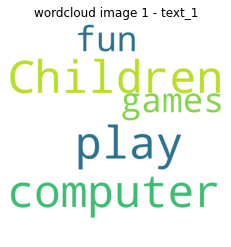

In [271]:
# plot the wordcloud image for text_1
plt.imshow(wordcloud_1_text_1)
plt.axis('off')
plt.title('wordcloud image 1 - text_1')
plt.savefig('plots/wordcloud_1_text_1.png',
            facecolor='white')
plt.show()

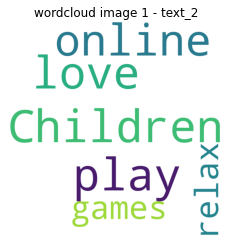

In [272]:
# plot the wordcloud image for text_2
plt.imshow(wordcloud_1_text_2)
plt.axis('off')
plt.title('wordcloud image 1 - text_2')
plt.savefig('plots/wordcloud_1_text_2.png',
            facecolor='white')
plt.show()

In [273]:
# defining two sample text with lower relatedness to each other
text_1 = 'Children like to play computer games'
text_2 = 'Children prefer eating chocolate cake'

In [274]:
# preprocessing the text
_, cq1_ = preprocess_text(text_1)
cq1_ = str(cq1_)
cq1_

'children like play computer games'

In [275]:
# preprocessing the text
_, cq2_ = preprocess_text(text_2)
cq2_ = str(cq2_)
cq2_

'children prefer eating chocolate cake'

In [276]:
# transforming text to a sequence of integers
q1_seq = tokenizer.texts_to_sequences([cq1_])[0]
q1_seq

[560, 5, 210, 113, 359]

In [277]:
# transforming text to a sequence of integers
q2_seq = tokenizer.texts_to_sequences([cq2_])[0]
q2_seq

[560, 899, 676, 2526, 2655]

In [278]:
# pad_sequences pads sequences to the same length
# padding='post' to pad after each sequence
q1_seq = pad_sequences([q1_seq],
                       maxlen=30,
                       padding='post')
q1_seq[0]

array([560,   5, 210, 113, 359,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0], dtype=int32)

In [279]:
# pad_sequences pads sequences to the same length
# padding='post' to pad after each sequence
q2_seq = pad_sequences([q2_seq],
                       maxlen=30,
                       padding='post')
q2_seq[0]

array([ 560,  899,  676, 2526, 2655,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0], dtype=int32)

In [280]:
# predicting the relatedness of the two texts
answer_3 = loaded_model.predict([q1_seq, q2_seq],
                                verbose=1)
answer_3[0][0]

1/1 [==============================] - 0s 19ms/step


0.0086200535

In [281]:
# generate wordclouds
wordcloud_2_text_1 = plot_wordcloud(text_1)
wordcloud_2_text_2 = plot_wordcloud(text_2)

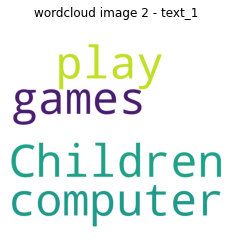

In [282]:
# plot the wordcloud image for text_1
plt.imshow(wordcloud_2_text_1)
plt.axis('off')
plt.title('wordcloud image 2 - text_1')
plt.savefig('plots/wordcloud_2_text_1.png',
            facecolor='white')
plt.show()

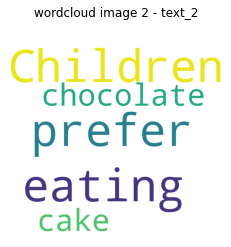

In [283]:
# plot the wordcloud image for text_2
plt.imshow(wordcloud_2_text_2)
plt.axis('off')
plt.title('wordcloud image 2 - text_2')
plt.savefig('plots/wordcloud_2_text_2.png',
            facecolor='white')
plt.show()

In [284]:
# importing tsne (t-distributed stochastic neighbor embedding)
# from manifold module that implements data embedding techniques
# in the scikit-learn library
from sklearn.manifold import TSNE

# t-SNE is a tool to visualize high-dimensional data
tsne = TSNE(n_components=2,
            random_state=0)

# declaring embeddings_dict dictionary
embeddings_dict = dict()

# GloVe is an unsupervised learning algorithm for obtaining vector
# representations for words
# Training is performed on aggregated global word-word co-occurrence
# statistics from a corpus
# Resulting representations show interesting linear substructures of
# the word vector space
# This dataset contains English word vectors pre-trained on the
# combined Wikipedia corpora
# GloVe embeddings use these pre-trained embeddings to quantify
# word co-occurrence
# GloVe embeddings capture some aspects of word meaning
# opening text file with glove embeddings
with open('glove.6B.300d.txt', 'r') as file:
    # reading the file line by line
    # tokenizing each line into tokens
    # adding data to word_vectors dictionary
    for line in file:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:],
                            'float32')
        embeddings_dict[word] = vector

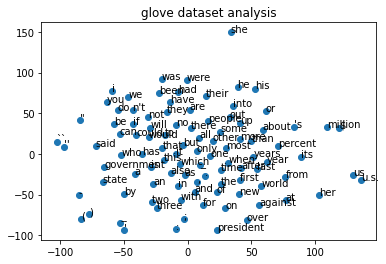

In [285]:
# plotting the sample glove dataset words for visualization
# purposes

words = list(embeddings_dict.keys())

vectors = [embeddings_dict[word] for word in words]

Y = tsne.fit_transform(vectors[:100])

plt.scatter(Y[:, 0], Y[:, 1])

for label, x, y in zip(words, Y[:, 0], Y[:, 1]):
    plt.annotate(label,
                 xy=(x, y),
                 xytext=(0, 0),
                 textcoords='offset points')

plt.title('glove dataset analysis')

plt.savefig('plots/glove_dataset_analysis.png',
            facecolor='white')

plt.show()

In [286]:
# generating the requirements.txt file
# to install the correct versions of the required python
# libraries or packages in a venv (virtual environment)
!pip3 freeze > requirements.txt